
# **Analisis Sentimen Pemilu Indonesia Tahun 2024 Dari Media Sosial X Menggunakan Algoritma Naive Bayes Classifier**

**Step-1. Import Library dan Read CSV**

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


In [ ]:
df = pd.read_csv("/content/Data_Pemilu2024_1600.csv")
df.head()

,created_at,full_text,username
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan anal...,narasi_politik
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan ...,narasi_politik
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi ...,narasi_politik
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 202...,KompasData
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua i...,fath_rsan


In [ ]:
#info() digunakan untuk menampilkan informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1652 non-null   object
 1   full_text   1652 non-null   object
 2   username    1652 non-null   object
dtypes: object(3)
memory usage: 38.8+ KB


In [ ]:
#Mengetahui Jumlah Baris dan Kolom data

df.shape

(1652, 3)

In [ ]:
#Fungsi ini memberikan ringkasan statistik deskriptif dari kolom-kolom numerik (dan kadang juga non-numerik) dalam sebuah DataFrame df

df.describe()


,created_at,full_text,username
count,1652,1652,1652
unique,1637,1651,1186
top,Mon Feb 12 15:29:23 +0000 2024,Lapas Cirebon Peringati Isra Mi raj 1445H dan ...,hariankompas
freq,2,2,48


**Step-2. Data Cleansing/Pembersihan Data**

In [ ]:
#Menghapus baris yang isinya sama persis (duplikat) pada kolom full_text

df = df.drop_duplicates(subset=['full_text'])

In [ ]:
#Mengecek kolom yang duplikat

df.duplicated().sum()

np.int64(0)

In [ ]:
#Menghapus baris dengan nilai kosong (NaN)

df = df.dropna()

In [ ]:
#Mampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun

df.isna()

,created_at,full_text,username
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1647,False,False,False
1648,False,False,False
1649,False,False,False
1650,False,False,False


In [ ]:
#Mengecek kolom yang (NaN) kosong

df.isna().any()

,0
created_at,False
full_text,False
username,False


In [ ]:
#mencari jumlah baris data yang bernilai null terdapat kolom label memiliki nilai kosong

df.isnull().sum()

,0
created_at,0
full_text,0
username,0


In [ ]:
#Mengecek kembali jumlah kolom

df.shape

(1651, 3)

In [ ]:
#Menampilkan 5 baris data

df.head(5)

,created_at,full_text,username
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan anal...,narasi_politik
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan ...,narasi_politik
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi ...,narasi_politik
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 202...,KompasData
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua i...,fath_rsan


In [ ]:
# Fungsi untuk membersihkan teks dari tweet
def clean_twitter_text(text):

    # Menghapus mention (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Menghapus hashtag (#tag)
    text = re.sub(r'#\w+', '', text)

    # Menghapus retweet (RT)
    text = re.sub(r'RT[\s]+', '', text)

    # Menghapus tautan/URL
    text = re.sub(r'https?://\S+', '', text)

    # Menghapus karakter non-alfanumerik (hanya menyisakan huruf, angka, dan spasi)
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)

    # Menghapus spasi berlebih dan strip spasi di awal/akhir
    text = re.sub(r'\s+', ' ', text).strip()

    # Mengembalikan teks yang sudah dibersihkan
    return text

# Menerapkan fungsi pembersih ke setiap tweet di kolom 'full_text' dari DataFrame
df['clean_text'] = df['full_text'].apply(clean_twitter_text)


In [ ]:
#Menerapkan teks lower keseluruan data

df['clean_text'] = df['clean_text'].str.lower()

In [ ]:
#Menampilkan 5 baris data

df.head(5)

,created_at,full_text,username,clean_text
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan anal...,narasi_politik,bentukbentuk kecurangannya diurai dengan anali...
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan ...,narasi_politik,digunakan untuk tujuan memenangkan pemilu dan ...
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi ...,narasi_politik,dirty vote full movie dokumenter dibintangi ol...
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 202...,KompasData,hitung cepat kompas pemilu 2024 independen dan...
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua i...,fath_rsan,yuk jadi pemilih bijak dan maksimalkan semua i...


**Step-3. Pre-Processing:**

*   Tokenize
*   Stemming
*   Stopword
*   Normalisasi


In [ ]:
# Kamus normalisasi: kata tidak baku → kata baku
normalization_dict = {
    # Umum
    "gak": "tidak", "yg" : "yang", "gue": "saya",
    "gk": "tidak", "kalo":"kalau", "nyoblos": "coblos", "bikin":"buat",

}


def normalisasi(str_text):
  # Mengganti 'norm' dengan 'normalization_dict'
  for i in normalization_dict:
    str_text = str_text.replace(i, normalization_dict[i])
  return str_text

df['clean_text'] = df['clean_text'].apply(lambda x: normalisasi(x))
df

,created_at,full_text,username,clean_text
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan anal...,narasi_politik,bentukbentuk kecurangannya diurai dengan anali...
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan ...,narasi_politik,digunakan untuk tujuan memenantidakan pemilu d...
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi ...,narasi_politik,dirty vote full movie dokumenter dibintangi ol...
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 202...,KompasData,hitung cepat kompas pemilu 2024 independen dan...
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua i...,fath_rsan,yuk jadi pemilih bijak dan maksimalkan semua i...
...,...,...,...,...
1647,Fri Jan 12 09:47:43 +0000 2024,Pemprov Banten Ajak Semua Pihak Tingkatkan Par...,indopos_id,pemprov banten ajak semua pihak tintidakatkan ...
1648,Thu Jan 11 14:28:16 +0000 2024,Komisi Pemilihan Umum (KPU) RI berencana menga...,heralddotID,komisi pemilihan umum kpu ri berencana mengatu...
1649,Thu Jan 11 05:47:39 +0000 2024,Wakil Ketua II DPRD Kota Bandung Achmad Nugrah...,prolite_news,wakil ketua ii dprd kota bandung achmad nugrah...
1650,Fri Jan 05 14:00:43 +0000 2024,Pulang kerja langsung pulang ️ Pulang kerja la...,golkar_id,pulang kerja langsung pulang pulang kerja lang...


In [ ]:
#Menampilkan 5 baris data

df.head(5)

,created_at,full_text,username,clean_text
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan anal...,narasi_politik,bentukbentuk kecurangannya diurai dengan anali...
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan ...,narasi_politik,digunakan untuk tujuan memenantidakan pemilu d...
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi ...,narasi_politik,dirty vote full movie dokumenter dibintangi ol...
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 202...,KompasData,hitung cepat kompas pemilu 2024 independen dan...
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua i...,fath_rsan,yuk jadi pemilih bijak dan maksimalkan semua i...


In [ ]:
# Tokenize

def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['clean_text'].apply(tokenize)
pd.set_option('display.max_colwidth', None)
df.head()

,created_at,full_text,username,clean_text,tokenize
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan analisa hukum tata negara. https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,bentukbentuk kecurangannya diurai dengan analisa hukum tata negara,"[bentukbentuk, kecurangannya, diurai, dengan, analisa, hukum, tata, negara]"
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan merusak tatanan demokrasi. Penggunaan infrastruktur kekuasaan yang kuat tanpa malu-malu dipertontonkan secara telanjang demi mempertahankan status quo. https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,digunakan untuk tujuan memenantidakan pemilu dan merusak tatanan demokrasi penggunaan infrastruktur kekuasaan yang kuat tanpa malumalu dipertontonkan secara telanjang demi mempertahankan status quo,"[digunakan, untuk, tujuan, memenantidakan, pemilu, dan, merusak, tatanan, demokrasi, penggunaan, infrastruktur, kekuasaan, yang, kuat, tanpa, malumalu, dipertontonkan, secara, telanjang, demi, mempertahankan, status, quo]"
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi oleh tiga ahli hukum tata negara. Mereka adalah Zainal Arifin Mochtar Bivitri Susanti dan Feri Amsari. Ketiganya mengungkap berbagai instrumen kekuasaan telah https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,dirty vote full movie dokumenter dibintangi oleh tiga ahli hukum tata negara mereka adalah zainal arifin mochtar bivitri susanti dan feri amsari ketiganya menguntidakap berbagai instrumen kekuasaan telah,"[dirty, vote, full, movie, dokumenter, dibintangi, oleh, tiga, ahli, hukum, tata, negara, mereka, adalah, zainal, arifin, mochtar, bivitri, susanti, dan, feri, amsari, ketiganya, menguntidakap, berbagai, instrumen, kekuasaan, telah]"
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 2024 Independen dan Akurat #AdadiKompas https://t.co/4sdA8Z3v5K,KompasData,hitung cepat kompas pemilu 2024 independen dan akurat,"[hitung, cepat, kompas, pemilu, 2024, independen, dan, akurat]"
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua informasi dan jangan golput #Pemilu2024 #PemiluDamai #Indonesia,fath_rsan,yuk jadi pemilih bijak dan maksimalkan semua informasi dan jangan golput,"[yuk, jadi, pemilih, bijak, dan, maksimalkan, semua, informasi, dan, jangan, golput]"


In [ ]:
#MengInstalll Library Sastrasi untuk Stopword

!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
#FILTERING ATAU STOPWORD REMOVAL

nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword'] = df['tokenize'].apply(lambda x:
remove_stopwords(x))
pd.set_option('display.max_colwidth', None)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,created_at,full_text,username,clean_text,tokenize,stopword
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan analisa hukum tata negara. https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,bentukbentuk kecurangannya diurai dengan analisa hukum tata negara,"[bentukbentuk, kecurangannya, diurai, dengan, analisa, hukum, tata, negara]","[bentukbentuk, kecurangannya, diurai, analisa, hukum, tata, negara]"
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan merusak tatanan demokrasi. Penggunaan infrastruktur kekuasaan yang kuat tanpa malu-malu dipertontonkan secara telanjang demi mempertahankan status quo. https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,digunakan untuk tujuan memenantidakan pemilu dan merusak tatanan demokrasi penggunaan infrastruktur kekuasaan yang kuat tanpa malumalu dipertontonkan secara telanjang demi mempertahankan status quo,"[digunakan, untuk, tujuan, memenantidakan, pemilu, dan, merusak, tatanan, demokrasi, penggunaan, infrastruktur, kekuasaan, yang, kuat, tanpa, malumalu, dipertontonkan, secara, telanjang, demi, mempertahankan, status, quo]","[tujuan, memenantidakan, pemilu, merusak, tatanan, demokrasi, penggunaan, infrastruktur, kekuasaan, kuat, malumalu, dipertontonkan, telanjang, mempertahankan, status, quo]"
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi oleh tiga ahli hukum tata negara. Mereka adalah Zainal Arifin Mochtar Bivitri Susanti dan Feri Amsari. Ketiganya mengungkap berbagai instrumen kekuasaan telah https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,dirty vote full movie dokumenter dibintangi oleh tiga ahli hukum tata negara mereka adalah zainal arifin mochtar bivitri susanti dan feri amsari ketiganya menguntidakap berbagai instrumen kekuasaan telah,"[dirty, vote, full, movie, dokumenter, dibintangi, oleh, tiga, ahli, hukum, tata, negara, mereka, adalah, zainal, arifin, mochtar, bivitri, susanti, dan, feri, amsari, ketiganya, menguntidakap, berbagai, instrumen, kekuasaan, telah]","[dirty, vote, full, movie, dokumenter, dibintangi, ahli, hukum, tata, negara, zainal, arifin, mochtar, bivitri, susanti, feri, amsari, ketiganya, menguntidakap, instrumen, kekuasaan]"
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 2024 Independen dan Akurat #AdadiKompas https://t.co/4sdA8Z3v5K,KompasData,hitung cepat kompas pemilu 2024 independen dan akurat,"[hitung, cepat, kompas, pemilu, 2024, independen, dan, akurat]","[hitung, cepat, kompas, pemilu, 2024, independen, akurat]"
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua informasi dan jangan golput #Pemilu2024 #PemiluDamai #Indonesia,fath_rsan,yuk jadi pemilih bijak dan maksimalkan semua informasi dan jangan golput,"[yuk, jadi, pemilih, bijak, dan, maksimalkan, semua, informasi, dan, jangan, golput]","[yuk, pemilih, bijak, maksimalkan, informasi, golput]"


**Step-4. Pelabelan Dengan Lexicon**

In [ ]:
#menentukan polaritas sentimen tweet dengan sentimen lexicon

lexicon_postive = dict()
import csv
with open("/content/drive/MyDrive/TUGAS KULIAH/A_TugasAkhir/Kamus/positive.tsv", 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')  # Ganti delimiter kalau TSV: delimiter='\t'
    next(reader)  # Skip the header row
    for row in reader:
        if len(row) >= 2:  # Pastikan ada minimal 2 kolom
            lexicon_postive[row[0].strip()] = int(row[1])

lexicon_negative = dict()
with open("/content/drive/MyDrive/TUGAS KULIAH/A_TugasAkhir/Kamus/negative.tsv", 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')  # Ganti delimiter kalau TSV: delimiter='\t'
    next(reader)  # Skip the header row
    for row in reader:
        if len(row) >= 2:  # Pastikan ada minimal 2 kolom
            lexicon_negative[row[0].strip()] = int(row[1])


#Function untuk menentukan sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_postive):
            score = score + lexicon_postive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity='positif'
    elif (score < 0):
        polarity='negatif'
    else:
        polarity='netral'
    return score, polarity

In [ ]:
#Hasil dari penentuan polaritas sentimen tweet

results = df['stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['sentimen_score'] = results[0]
df['sentimen'] = results[1]


print(df['sentimen'].value_counts()),df.shape

sentimen
negatif    731
positif    705
netral     215
Name: count, dtype: int64


(None, (1651, 8))

In [ ]:
#Menampilkan data 5 baris

df.head(5)

,created_at,full_text,username,clean_text,tokenize,stopword,sentimen_score,sentimen
0,Mon Feb 12 23:56:27 +0000 2024,Bentuk-bentuk kecurangannya diurai dengan analisa hukum tata negara. https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,bentukbentuk kecurangannya diurai dengan analisa hukum tata negara,"[bentukbentuk, kecurangannya, diurai, dengan, analisa, hukum, tata, negara]","[bentukbentuk, kecurangannya, diurai, analisa, hukum, tata, negara]",1,positif
1,Mon Feb 12 23:56:26 +0000 2024,digunakan untuk tujuan memenangkan pemilu dan merusak tatanan demokrasi. Penggunaan infrastruktur kekuasaan yang kuat tanpa malu-malu dipertontonkan secara telanjang demi mempertahankan status quo. https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,digunakan untuk tujuan memenantidakan pemilu dan merusak tatanan demokrasi penggunaan infrastruktur kekuasaan yang kuat tanpa malumalu dipertontonkan secara telanjang demi mempertahankan status quo,"[digunakan, untuk, tujuan, memenantidakan, pemilu, dan, merusak, tatanan, demokrasi, penggunaan, infrastruktur, kekuasaan, yang, kuat, tanpa, malumalu, dipertontonkan, secara, telanjang, demi, mempertahankan, status, quo]","[tujuan, memenantidakan, pemilu, merusak, tatanan, demokrasi, penggunaan, infrastruktur, kekuasaan, kuat, malumalu, dipertontonkan, telanjang, mempertahankan, status, quo]",0,netral
2,Mon Feb 12 23:56:25 +0000 2024,Dirty Vote (Full Movie) Dokumenter dibintangi oleh tiga ahli hukum tata negara. Mereka adalah Zainal Arifin Mochtar Bivitri Susanti dan Feri Amsari. Ketiganya mengungkap berbagai instrumen kekuasaan telah https://t.co/ujOpX5ckFL #pemilu2024 #pilpres2024 #Pileg2024 #dirtyvote,narasi_politik,dirty vote full movie dokumenter dibintangi oleh tiga ahli hukum tata negara mereka adalah zainal arifin mochtar bivitri susanti dan feri amsari ketiganya menguntidakap berbagai instrumen kekuasaan telah,"[dirty, vote, full, movie, dokumenter, dibintangi, oleh, tiga, ahli, hukum, tata, negara, mereka, adalah, zainal, arifin, mochtar, bivitri, susanti, dan, feri, amsari, ketiganya, menguntidakap, berbagai, instrumen, kekuasaan, telah]","[dirty, vote, full, movie, dokumenter, dibintangi, ahli, hukum, tata, negara, zainal, arifin, mochtar, bivitri, susanti, feri, amsari, ketiganya, menguntidakap, instrumen, kekuasaan]",2,positif
3,Mon Feb 12 23:53:24 +0000 2024,[ #Pemilu2024 ] Hitung Cepat Kompas Pemilu 2024 Independen dan Akurat #AdadiKompas https://t.co/4sdA8Z3v5K,KompasData,hitung cepat kompas pemilu 2024 independen dan akurat,"[hitung, cepat, kompas, pemilu, 2024, independen, dan, akurat]","[hitung, cepat, kompas, pemilu, 2024, independen, akurat]",-2,negatif
4,Mon Feb 12 23:52:58 +0000 2024,Yuk jadi pemilih bijak dan maksimalkan semua informasi dan jangan golput #Pemilu2024 #PemiluDamai #Indonesia,fath_rsan,yuk jadi pemilih bijak dan maksimalkan semua informasi dan jangan golput,"[yuk, jadi, pemilih, bijak, dan, maksimalkan, semua, informasi, dan, jangan, golput]","[yuk, pemilih, bijak, maksimalkan, informasi, golput]",2,positif


**Step-5. Ekstraksi TF-IDF dan Split Data**

In [ ]:
# Import library yang dibutuhkan
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Ambil fitur dan label
X = df['stopword'].apply(lambda x: ' '.join(x))  # Gabungkan token jadi kalimat
y = df['sentimen']  # Label (target)

# Split Data
# Membagi data 80% data training dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
#Menampilkan jumlah baris dan kolom dari masing-masing dataset yang displit

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1320,)
(331,)
(1320,)
(331,)


**Step-6. Penerapan Model Naive Bayes Classifier**

In [ ]:
#Latih Model Naive Bayes

from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB

model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
#Evaluasi Model


# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report


model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


# Menampilkan hasil evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6163141993957704

Classification Report:
               precision    recall  f1-score   support

     negatif       0.60      0.71      0.65       147
      netral       0.50      0.14      0.22        43
     positif       0.64      0.67      0.65       141

    accuracy                           0.62       331
   macro avg       0.58      0.50      0.51       331
weighted avg       0.61      0.62      0.60       331



In [ ]:
#VisualisasiConfusion Matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

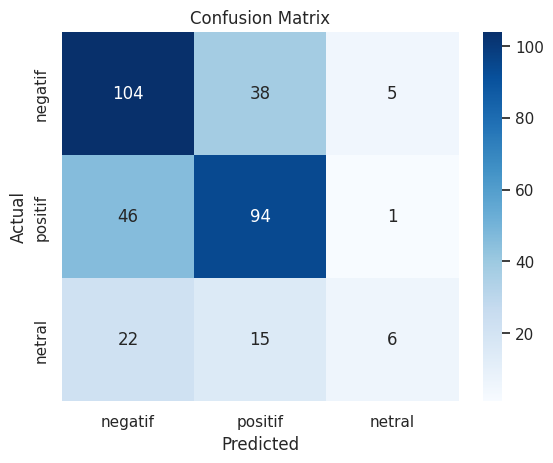

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique labels from y_test
class_label = y_test.unique()

# Predict using the trained model
# Assuming 'model' is your trained Naive Bayes model and 'X_test_tfidf' is your test data
naive_bayes_pred = model.predict(X_test_tfidf)  # Assign predictions to naive_bayes_pred

# Pakai parameter `labels` untuk memaksakan urutan dan ukuran
cm = confusion_matrix(y_test, naive_bayes_pred, labels=class_label)

# Visualisasikan
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Mencoba SMOTE balancing agarm memperbaiki sentimen netral

!pip install imbalanced-learn

Jumlah sampel per kelas sebelum SMOTE:
sentimen
negatif    584
positif    564
netral     172
Name: count, dtype: int64

Jumlah sampel per kelas setelah SMOTE pada data training:
sentimen
negatif    584
positif    584
netral     584
Name: count, dtype: int64
Accuracy: 0.595166163141994
Classification Report:
               precision    recall  f1-score   support

     negatif       0.66      0.63      0.64       147
      netral       0.32      0.47      0.38        43
     positif       0.66      0.60      0.63       141

    accuracy                           0.60       331
   macro avg       0.55      0.56      0.55       331
weighted avg       0.62      0.60      0.60       331



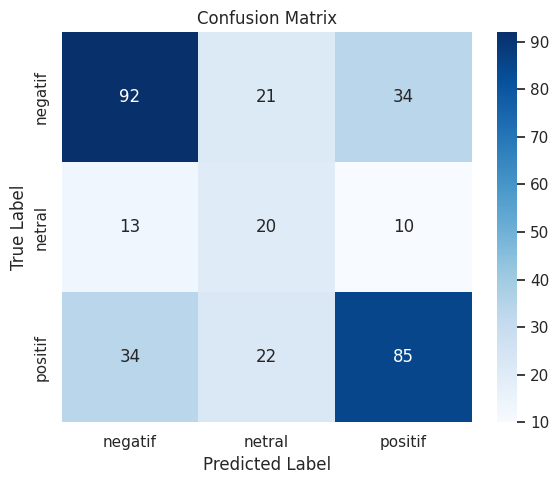

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil fitur dan label
X = df['stopword'].apply(lambda x: ' '.join(x))  # Gabungkan token jadi kalimat
y = df['sentimen']  # Label (target)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)
# SMOTE (oversampling untuk seimbangkan kelas)
# Mendapatkan jumlah sample per kelas sebelum oversampling
print("Jumlah sampel per kelas sebelum SMOTE:")
print(y_train.value_counts())


# SMOTE (oversampling untuk seimbangkan kelas)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("\nJumlah sampel per kelas setelah SMOTE pada data training:")
print(y_train_bal.value_counts())


# Train Model
model = MultinomialNB()
model.fit(X_train_bal, y_train_bal)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


**Visualisasi dengan wordcloud**

In [ ]:
!pip install wordcloud

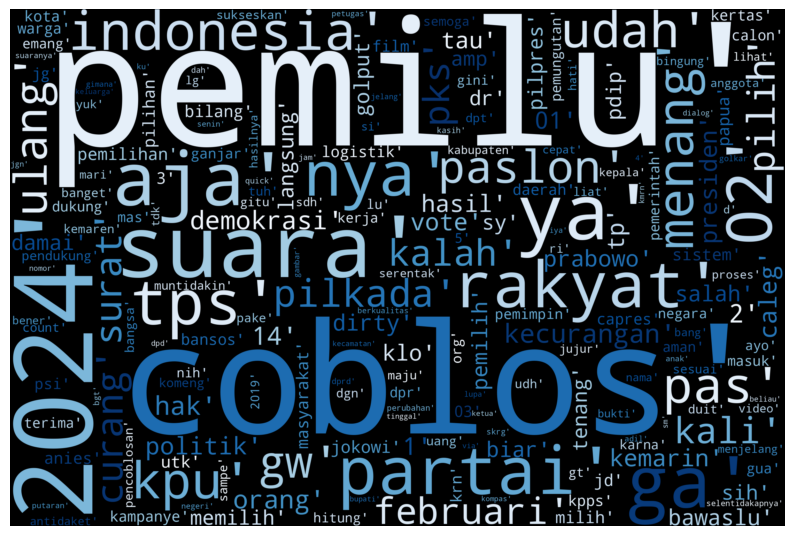

In [ ]:
# Make sure pandas is imported

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Convert the 'full_text' column to strings, handling NaN values
# Replace 'data' with 'df' in the following line:
all_words = ' '.join([str(tweets) for tweets in df['stopword'] if isinstance(tweets, list) and tweets])
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

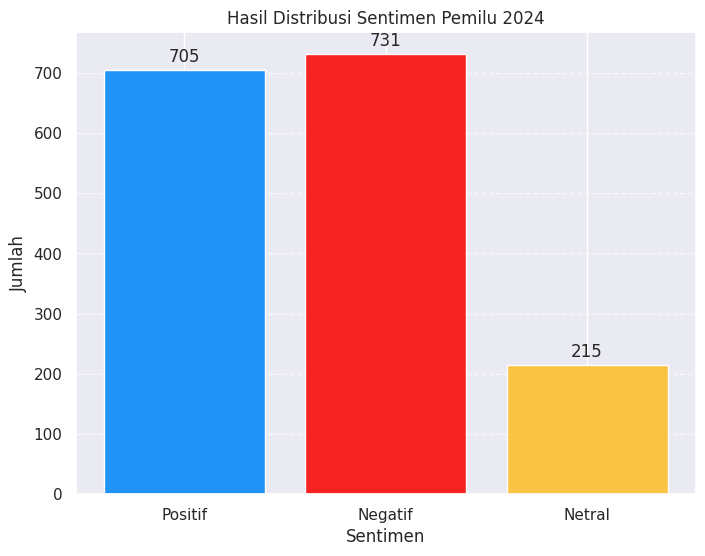

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']

# Initialize sentiment counters
total_positif = 0
total_negatif = 0
total_netral = 0

# Assuming you have a DataFrame named 'df' with a 'polarity' column:
for polarity in df['sentimen']:
    if polarity == 'positif':
        total_positif += 1
    elif polarity == 'negatif':
        total_negatif += 1
    else:
        total_netral += 1

counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Hasil Distribusi Sentimen Pemilu 2024")

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords # Pastikan stopwords diimpor

# Data yang akan digunakan
positive_data = df[df['sentimen'] ==
'positif']['stopword'].values

netral_data = df[df['sentimen'] ==
'netral']['stopword'].values

negative_data = df[df['sentimen'] ==
'negatif']['stopword'].values

# Menggunakan stopwords yang sudah ada dari NLTK
nltk.download('stopwords', quiet=True) # Download stopwords jika belum ada
custom_stopwords = stopwords.words('indonesian') # Menggunakan daftar stopwords bahasa Indonesia

# Flatten the list of lists into a single list of words for each sentiment
flattened_positive_data = [word for sublist in positive_data for word in sublist]
flattened_netral_data = [word for sublist in netral_data for word in sublist]
flattened_negative_data = [word for sublist in negative_data for word in sublist]


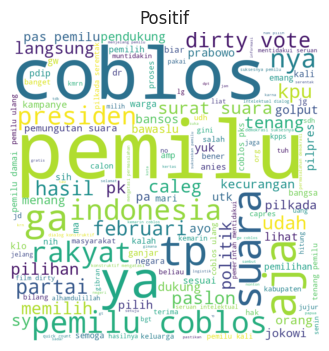

In [ ]:

# Membuat WordCloud untuk kata-kata positif
positive_wordcloud = WordCloud(width=800, height=800,
    background_color='white',
    stopwords=custom_stopwords, # Menggunakan custom_stopwords yang sudah didefinisikan
    min_font_size=10).generate(' '.join(flattened_positive_data)) # Join the flattened list


# Menampilkan wordclouds (tambahkan kode untuk menampilkan, contohnya)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positif')

plt.tight_layout()
plt.show()

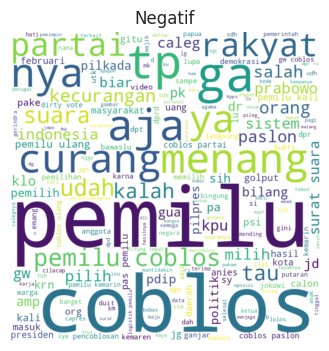

In [ ]:
# Membuat WordCloud untuk kata-kata negatif
negative_wordcloud = WordCloud(width=800, height=800,
    background_color='white',
    stopwords=custom_stopwords, # Menggunakan custom_stopwords yang sudah didefinisikan
    min_font_size=10).generate(' '.join(flattened_negative_data)) # Join the flattened list

# Menampilkan wordclouds (tambahkan kode untuk menampilkan, contohnya)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negatif')

plt.tight_layout()
plt.show()

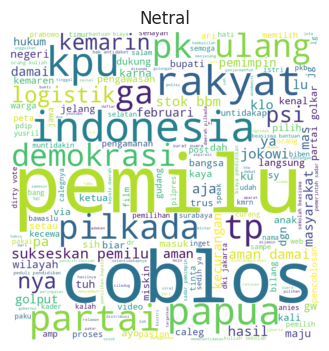

In [ ]:
# Membuat WordCloud untuk kata-kata netral
netral_wordcloud = WordCloud(width=800, height=800,
    background_color='white',
    stopwords=custom_stopwords, # Menggunakan custom_stopwords yang sudah didefinisikan
    min_font_size=10).generate(' '.join(flattened_netral_data)) # Join the flattened list


# Menampilkan wordclouds (tambahkan kode untuk menampilkan, contohnya)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 2)
plt.imshow(netral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netral')

plt.tight_layout()
plt.show()

**IndoBERT**